<a href="https://colab.research.google.com/github/FreeOfConfines/ExampleNNWithKerasAndTensorflow/blob/master/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##References

1.  http://www.stat.cmu.edu/~ryantibs/advmethods/notes/logreg.pdf
2.  http://www.holehouse.org/mlclass/06_Logistic_Regression.html



## Getting Started

In this article on Logistic Regression, we will explore the following:
1. Mathematics behind logistic regression algorithm to two-class and multi-class classification problem
2. Implement logistic regression with TF/Keras library and apply it on Fashion MNIST database. In the implementation section, we will explore two ways to implement this algorithm.
3. Finally, we will summarize results from the implementations.

Mathematical description should be easy to follow and should help understand fundamentals of logistic regression. If you are not keen on the math, then you may proceed directly to the Implementation and Conclusion sections.

## Classification Problems and Logistic Regression



Classification problems involve categorizing or assigning an input to one of the many discrete classes or labels. For instance, classifying an input image as a picture of an article of clothing, like Pant, Skirt, Jacket etc. Classification problems are different from typical regression problems in that their output classes are discrete, i.e., not continuous. In other words, Label Pant, Label Skirt, Label Jacket etc. are discrete classes. Typically, we associate a numerical ID with each class.

Logistic regression is a simple algorithm applied on Classification problems. Given an observation, logistic regression classifier will compute a **probability** metric and will label the observation to a class with the highest probability.

Later we will work with Fashion MNIST database which is a collection of images. Therefore, it is fair to assume that each observation is an image. Let us formalize the approach.
 

## Two-Class Classification Problem

In a Two-Class Classification problem, there are two output classes, say Class 0 and Class 1. Given an observation, logistic regression will label the observation as Class 1 if the metric is greater than 0.5 else label it as Class 0.

We are given a group of images and their correct class labels; this group forms the **training data**. Let $x_i$ be the $i$-th image of the tranining set and $y_i$ be the class label of the $i$-th image. Each image is a $p \times p$ matrix, which means $x_i$ is a flattened vector with $p^2$ entries. Class label of $i$-th image takes one of two values, i.e., $0$ or $1$. 

The **probability** metric that an $i$-th image belongs to Class 1 is defined as:
\begin{equation}
P(\hat{y_i}=1 | x_i, \beta) = \frac{e^{\beta^{T}x_i}}{1+ e^{\beta^{T}x_i}}=p_i
\end{equation}
Since there are only two classes, the probability metric that the image belongs to Class 0 is:
\begin{equation}
P(\hat{y_i}=0 | x_i, \beta) = 1-P(\hat{y_i}=1 | x_i, \beta) =1- p_i = q_i
\end{equation}

Let us understand the above formulation a little better:

1. The metric $P(\hat{y_i}=1 | x_i, \beta)$ **[sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function)** which takes on values between 0 and 1. Note that  $P(\hat{y_i}=1 | x_i, \beta)$ and $P(\hat{y_i}=0 | x_i, \beta)$ adds up to 1.
2.$\beta$ is a vector with $p^2$ entries, same as any $x_i$. $\beta$ is the vector we hope to **learn** by training our network on the set of input images and their associated ground-truth labels.
3. Keen readers would have noticed we have one parameter vector $\beta$ for two classes. For a problem with $k$ classes, $k-1$ $\beta$(s) are sufficient. This makes sense because the probability of belonging to the $k$-th class is simply one minus the sum of probabilities of belonging to all other classes.

Let us understand decision boundary of the classifier:

As mentioned earlier, an image is labeled as Class 1 if the probability metric is 0.5 or greater. In a spatial sense, classifier (after training) would have arrived at a $\beta$ that will put all images belonging to Class 1 on one side of the $p=0.5$ boundary and the rest on the other side. Therefore, $p=0.5$ defines a **decision** boundary.

\begin{equation}
P(\hat{y_i}=1 | x_i, \beta) = 0.5 \\
\implies \frac{e^{\beta^{T}x_i}}{1+ e^{\beta^{T}x_i}} =0.5 \\
\implies e^{\beta^{T}x_i} = 1 \\
\implies \beta^{T}x_i =0
\end{equation}
 
 The equation $\beta^{T}x_i =0$ is a hyperplane (in two dimensional space, it is a simple line) that divides the two classes of images; images on one side of this hyperplane belong to Class-0 and images on the other size of this hyperplane belong to Class-1.
 
 In other words, logistic regression tries to create **linear** boundaries in a $p^2$ dimensional space. We will revisit decision boundary later in the discussion.
 
 
### Estimate $\beta$ coefficients (Training Phase)

In training phase, we use $n$ images and their corresponding class labels to train or estimate *good* $\beta$ coefficients. Since we are working with probability metric, it is natural to use the **likelihood** objective function ($L(\beta)$):
\begin{equation}
L(\beta) = \prod_{k=1}^{n} P(Y_i = y_i | x_i, \beta)
\end{equation}

Let us understand the above formulation a little better:
1. There are $n$ terms within the product above and each of the term corresponds to an image in the training set.
2. For each image in the training set, we know the ground truth or the class label-note we are given that information. If $i$-th image belongs to Class 1 (as per ground truth), then use $p$ for the $i$-th entry in the product above. The objective function thus formed is the **likelihood** objective function.
3. Intuitively, we would want to estimate $\beta$ that maximizes the likelihood objective function.

An iterative optimization algorithm may be used to achieve this maximization, for instance, **weighted least-squares regression** is one such algorithm.

### Implementation Details

We will continue to explore the $L(\beta)$ formulation for the Two-Class problem further to familiarize with some nifty implementational details. If you have read other materials on logistic regression, you might have come across **cross entropy with logits**. I will try to explain how this fits into logistic regression:

In a Two-Class problem, $y_i$(s) take on value of $1$ or $0$, and so we can re-write the above equation:

\begin{equation}
L(\beta) = \prod_{i=1}^{n} P(Y_i = 0 | x_i, \beta)^{1-y_i}P(Y_i = 1 | x_i, \beta)^{y_i} \\
= \prod_{i=1}^{n} q_i^{1-y_i}p_i^{y_i}
\end{equation}

Clever part of the rewrite is that $i$-th term of the product is $q_i$ if $y_i=0$ else it is $p_i$. For convenience, we will work with **logarithm** of the cost function, often referred to as **log likelihood** objective function:
\begin{equation}
l(\beta) = log(L(\beta)) = \sum_{i=1}^{n}(1-y_i)log(q_i) + y_ilog(p_i)\\
= \sum_{i=1}^{n} log(q_i) + y_i log(\frac{p_i}{q_i})
\end{equation}

Let us understand the formulation a little better:
1. The term $log(\frac{p_i}{q_i})$ is often referred to as **logit** of $p_i$. 
2.  The $i$-term in the summation is referred to as **cross-entropy with logits**, cross-entropy with logits refer to how the appropriate $p$ or $q$ is picked based on class label of the $i$-th term.

### Discussion

We had shown that logistic regression creates linear boundaries to separate (in this case) the two classes. But not all classification problems will be so well-behaved, i.e., linear boundaries may not be sufficient to separate the two classes. 

Imagine a classification problem where Class-0 is every example within a unit circle (or sphere) and Class-1 is every example outside a unit circle (or sphere). Naturally, classification using linear boundaries **will not work** for this example. When faced with such classification problems, transforming input elements $x_i$ may help transform complex decision boundaries to those classifiable with linear boundaries. By the way, there is no guarantee we can find a transformation to achieve this.

## Multi-Class Classification Problem

In a Multi-Class Classification problem, there are $K$ possible class labels and the formalization is an extension of the Two-Class Classification problem. 

The **probability** metric that an $i$-th image belongs to Class-$k$, where $0 \leq k < K-1$, is defined as:
\begin{equation}
P(\hat{y_i}=k | x_i, \beta) = \frac{e^{\beta_{k}^{T}x_i}}{1+ e^{\beta_{k}^{T}x_i}}=p_{i,k}
\end{equation}

Let us understand the above formulation a little better:
1. There are $K-1$ $\beta$(s), i.e., one each for $K-1$ of the $K$ classes.
2. Note that $k$ goes from $0$ to $K-2$ and not $K-1$. This is so because $P(\hat{y_i}=K-1 | x_i, \beta)=1 - (p_0+p_1+...+p_{K-2})$.

Skipping some of the steps detailed in the Two-Class classification problem, let us review the forumulation for $l(\beta)$:
\begin{equation}
l(\beta) = log(L(\beta)) = \sum_{i=1}^{n}
[
\begin{array}{ccccc}
log(p_{i,0}), log(p_{i,1}), log(p_{i,2}),...,log(p_{i,K-1})
\end{array}
]
\left[
\begin{array}{c}
0 \\
0 \\
. \\
1 \\
. \\
0
\end{array}
\right]
\end{equation}

Let us understand the above formulation a little better:
1. The summation is over all images in the training set, in this case $n$ such images.
2. For an $i$-th image, i.e., a term within the summation, a dot product is computed between probability vector and **one-hot** vector.
3. The **one-hot** vector for the $i$-th image is $1$ only at $k$-th entry, i.e., $i$-th image belongs to Class-$k$.
4. The probability vector is the vector of probabilities computed for each class based on the probability formulation above.
5. The dot product simply picks one element from the probability vector. Same as above, this is referred to as **cross-etropy with logits**.

Finally, all $\beta_{k}$(s) are estimated as part of the training phase by optimizing, i.e., minimizing or maximizing, an objective function.


## Logistic Regression with TF/Keras Library

In this section, we will implement logistic regression and apply on Fashion MNIST database. The database contains images of articles of clothing and the task is to classify these images as one of a select number of labels. Training set contains $60000$ images and Test set contains $10000$ images. There are a total of $10$ class labels. Each image is a $28 \times 28$ matrix of pixel values.

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Download Fashion MNIST data
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(trImages, trLabels), (tImages, tLabels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(np.shape(trImages))
print(np.shape(tImages))
print(np.max(trImages[0]))
print(np.min(trImages[0]))

(60000, 28, 28)
(10000, 28, 28)
255
0


### Single-Layer Implementation

Single-layer implementation of logistic regression follows the discussion above. There is an input layer where each image is flattened into a vector of $28 \times 28 = 784$ elements and fed into a **Softmax** layer. Output of softmax layer are probabilities of the image belonging to one of the possible $10$ class labels. 

One may wonder why we use **Softmax** instead of **Sigmoid** formulation used in the formalization above. We will revisit this later in the discussion.

In [0]:
# Training Parameters
batchSize = 128
nEpochs = 50

In the code snippet below, we do the following:


1.   Defining a Sequential network model using Keras library
2.   Input images are flattened in the input layer and fed to subsequent layer
3.   Layer1 has 10 units whose activation function is **Softmax**
4.   Loss function is Sparse_Categorical_CrossEntropy
5.   Adam optimizer is used to minimize the above loss function during the training phase

A block diagram of the network shows dimensions of the various layers.

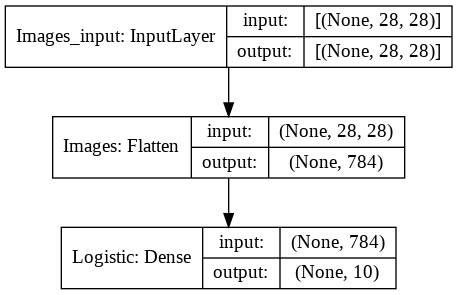

In [20]:
# Building a feed-forward network

model = tf.keras.Sequential() # empty model

# Layer0 simply flattens image input
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(trImages[0]),name='Images')
model.add(layer0)

# Layer1 is the output layer
numUnits_L1 = 10
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer1)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)


In [21]:
# Normalizing input (this step doesn't seem to be critical)
trImages = trImages/255.0
tImages = tImages/255.0

# Train the model
trHistory = model.fit(x=trImages, y=trLabels, batch_size=batchSize, epochs=nEpochs,shuffle=False, validation_split=0.0)

Epoch 1/150
60000/60000 [==============================] - 1s 19us/sample - loss: 2.2214 - acc: 0.5451
Epoch 2/150
60000/60000 [==============================] - 1s 20us/sample - loss: 2.0722 - acc: 0.6752
Epoch 3/150
60000/60000 [==============================] - 1s 19us/sample - loss: 1.9390 - acc: 0.6897
Epoch 4/150
60000/60000 [==============================] - 1s 19us/sample - loss: 1.8202 - acc: 0.6936
Epoch 5/150
60000/60000 [==============================] - 1s 19us/sample - loss: 1.7142 - acc: 0.6964
Epoch 6/150
60000/60000 [==============================] - 1s 18us/sample - loss: 1.6196 - acc: 0.6989
Epoch 7/150
60000/60000 [==============================] - 1s 19us/sample - loss: 1.5351 - acc: 0.7011
Epoch 8/150
60000/60000 [==============================] - 1s 18us/sample - loss: 1.4594 - acc: 0.7041
Epoch 9/150
60000/60000 [==============================] - 1s 18us/sample - loss: 1.3916 - acc: 0.7070
Epoch 10/150
60000/60000 [==============================] - 1s 20us/sampl

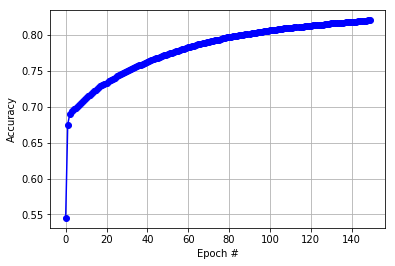

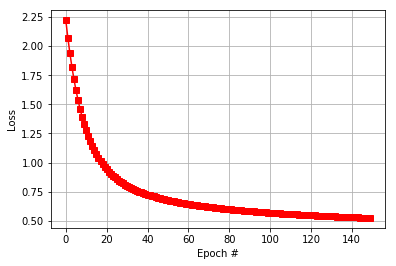

In [22]:
plt.figure(1)
plt.plot(trHistory.history['acc'], 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(trHistory.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [23]:
tPrediction = model.predict(tImages) # output is a matrix of probabilities where each row corresponds to an image in the Test Set
idCount = 0
nErrs = 0
for _ in tPrediction:
  predictedLabel = np.argmax(_)
  if predictedLabel != tLabels[idCount]:
     nErrs += 1
  idCount += 1

errRate = nErrs / float(np.shape(tImages)[0])
print("Prediction Error = %f" %errRate)

Prediction Error = 0.189700


### Multi-Layer Implementation

In a multi-layer implementation of logistic regression, we process the input layer through additional ReLu layers prior to feeding it to a Logistic layer. In this implementation, pixels of input images are preprocessed prior to generating probabilities. 

In this example, we add two additional layers: Layer-1 has 128 units with ReLu activation and Layer-2 has 32 units with ReLu activation as well. The Logistic layer (or Layer-3), as before, has 10 units with Softmax activation.

Such an implementation shows better classification performance.

In [0]:
# Training Parameters
batchSize = 128
nEpochs = 150

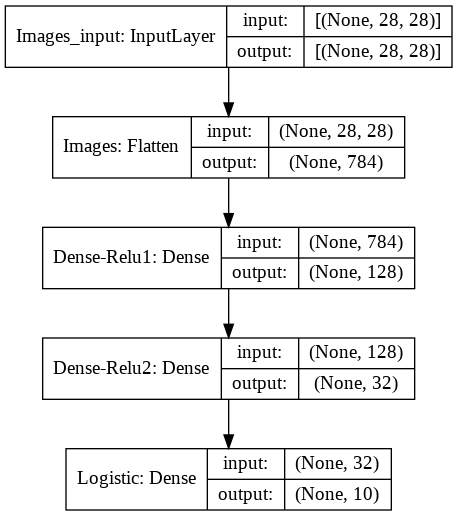

In [27]:
# Building a feed-forward network

model = tf.keras.Sequential() # empty model

# Layer0 simply flattens image input
layer0 = tf.keras.layers.Flatten(input_shape=np.shape(trImages[0]),name='Images')
model.add(layer0)

# Layer1 is a dense layer
numUnits_L1 =128
layer1 = tf.keras.layers.Dense(units=numUnits_L1, activation=tf.nn.relu, use_bias=True,name='Dense-Relu1')
model.add(layer1)

# Layer2 is a dense layer
numUnits_L2 =32
layer2 = tf.keras.layers.Dense(units=numUnits_L2, activation=tf.nn.relu, use_bias=True,name='Dense-Relu2')
model.add(layer2)

# Layer3 is the output layer
numUnits_L3 = 10
layer3 = tf.keras.layers.Dense(units=numUnits_L3, activation=tf.nn.softmax, use_bias=True, name='Logistic')
model.add(layer3)

# Compile model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy']) #'sparse_categorical_crossentropy'

# Plot Logistic Regression Network
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True)


In [6]:
# Normalizing input (this step doesn't seem to be critical)
trImages = trImages/255.0
tImages = tImages/255.0

# Train the model
trHistory = model.fit(x=trImages, y=trLabels, batch_size=batchSize, epochs=nEpochs,shuffle=False, validation_split=0.0)

Epoch 1/150
60000/60000 [==============================] - 2s 41us/sample - loss: 0.5674 - acc: 0.8059
Epoch 2/150
60000/60000 [==============================] - 2s 31us/sample - loss: 0.3935 - acc: 0.8607
Epoch 3/150
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3504 - acc: 0.8744
Epoch 4/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3263 - acc: 0.8826
Epoch 5/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3087 - acc: 0.8892
Epoch 6/150
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2938 - acc: 0.8939
Epoch 7/150
60000/60000 [==============================] - 2s 35us/sample - loss: 0.2818 - acc: 0.8978
Epoch 8/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.2701 - acc: 0.9017
Epoch 9/150
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2603 - acc: 0.9046
Epoch 10/150
60000/60000 [==============================] - 2s 30us/sampl

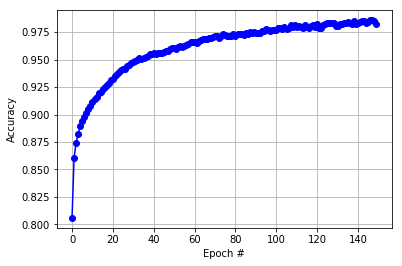

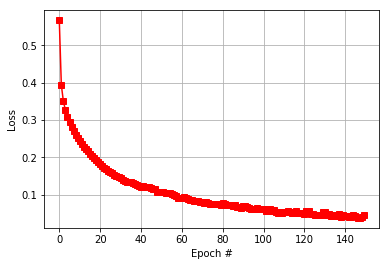

In [7]:
plt.figure(1)
plt.plot(trHistory.history['acc'], 'b-o')
#plt.plot(trHistory.history['loss'])
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Accuracy")

plt.figure(2)
plt.plot(trHistory.history['loss'],'r-s')
plt.grid(True)
plt.xlabel('Epoch #')
plt.ylabel("Loss")
plt.show()

In [19]:
tPrediction = model.predict(tImages) # output is a matrix of probabilities where each row corresponds to an image in the Test Set
idCount = 0
nErrs = 0
for _ in tPrediction:
  predictedLabel = np.argmax(_)
  if predictedLabel != tLabels[idCount]:
     nErrs += 1
  idCount += 1

errRate = nErrs / float(np.shape(tImages)[0])
print("Prediction Error = %f" %errRate)

Prediction Error = 0.123400


##Summary

In a Single-Layer implementation, we apply logistic regression directly on pixels of input images. With this network, we achieve classification error of ~$19\%$. In a Multi-Layer implementation, we apply two ReLu layers on pixels of input images prior to applying logistic regression. With this network, we achieve classification error of ~$12\%$.

Single-layer implementation uses a $784$ weight-matrix while Multi-Layer implementation uses a $784 \times 128 \times 32 \times 10 $ weight-matrix, i.e., a total of $> 32$ million weights. With a factor of $40000$ more weights, we achieve an improvement of $6%$ in classification error rate.

## Appendix

### Softmax Function

Given a vector $a = [a_1, a_2, ..., a_l]$, softmax function is defined as:
\begin{equation}
Softmax(a) = 
\left[
\begin{array}{ccccc}
\frac{e^{a_1}}{(e^{a_1} + e^{a_2} + ... +e^{a_l})} \\
\frac{e^{a_2}}{(e^{a_1} + e^{a_2} + ... +e^{a_l}) }\\
. \\
. \\
\frac{e^{a_l}}{(e^{a_1} + e^{a_2} + ... +e^{a_l}) }\\
\end{array}
\right]^T
\end{equation}

The below code snippet compares an implementation of Softmax to Tensorflow implementation of the same.

In [0]:
vecA = tf.constant([1.,2.,3.,-4.])

outRelu = tf.nn.relu(vecA)

with tf.Session() as sess:
  print(sess.run(outRelu))


[1. 2. 3. 0.]


In [0]:
# Quick implementation of softmax
# Use TF implementation of softmax to avoid precision problems
def mySoftMax(vecInput):
  dr = np.sum(np.exp(vecInput))
  nr = np.exp(vecInput)
  vecOutput = nr/dr
  return(vecOutput)

### tf.nn.softmax_cross_entropy_with_logits_v2

In the illustration example, Softmax(vecA) is computed and its dot product with a one-hot vector (vecLabels) is compuated. As we compare an implementation of this to one in Tensorflow, the difference is in the negative sign.

In [0]:
# Illustration of tf.nn.softmax_cross_entropy_with_logits_v2()
vecA = tf.constant([1.,2.,3.,-5.]) # feel free to change value assignments to the vector
vecLabels = tf.constant([1.,,0,0]) # one-hot vector

vecTFSftMaxCrossEntropyWithLogits = tf.nn.softmax_cross_entropy_with_logits_v2(labels=vecLabels, logits=vecA)

vecSftMaxOfA = tf.nn.softmax(vecA) # converts vecA into discrete probability distribution
vecLogSftMaxOfA = tf.log(vecSftMaxOfA) # takes log() of softmax output or prob. distribution
vecMyCrossEntropyWithLogits = tf.math.reduce_sum(tf.multiply(vecLogSftMaxOfA,vecLabels))

with tf.Session() as sess:
  print(sess.run(vecTFSftMaxCrossEntropyWithLogits))
  print(sess.run(vecMyCrossEntropyWithLogits))

3.815658
-3.815658


###ReLu

ReLu stands for Rectified Linear Unit and it is a non-linear activation function applied at a neural node. ReLu function passes non-negative numbers and clips negative numbers to zero.

The code snippet is an illustration of the ReLu units.

In [0]:
# Illustration of Softmax Function
vecA = tf.constant([1.,2.,3.,-5.]) # feel free to change value assignments to the vector
vecSftMaxOfA = tf.nn.softmax(vecA)

with tf.Session() as sess:
  # As computed by tensorflow
  print("Output computed by TF Softmax()")
  tfOutput = sess.run(vecSftMaxOfA)
  print(tfOutput)
  
  # Check if it matches my implementation
  print("Output compute by mySoftmax")
  print(mySoftMax(sess.run(vecA)))
  
  # Illustrate important properties of Softmax()
  print("Note: sum(output of softmax function) = %f" %np.sum(tfOutput))

Output computed by TF Softmax()
[9.0010487e-02 2.4467388e-01 6.6509253e-01 2.2311369e-04]
Output compute by mySoftmax
[9.0010479e-02 2.4467386e-01 6.6509253e-01 2.2311369e-04]
Note: sum(output of softmax function) = 1.000000
